In [13]:
import pandas as pd
import numpy as np
from IPython.display import  display,HTML
import seaborn as sns
import sys 
sys.path.insert(0, '../Credit_Card_Approval_Classification')
import utility
import config

In [14]:
credit_card_dataset=pd.read_csv(config.TRAINING_FILE)

In [ ]:
utility.

In [144]:
df1=pd.read_csv("data/dataset.csv")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Years Employed', ylabel='Density'>

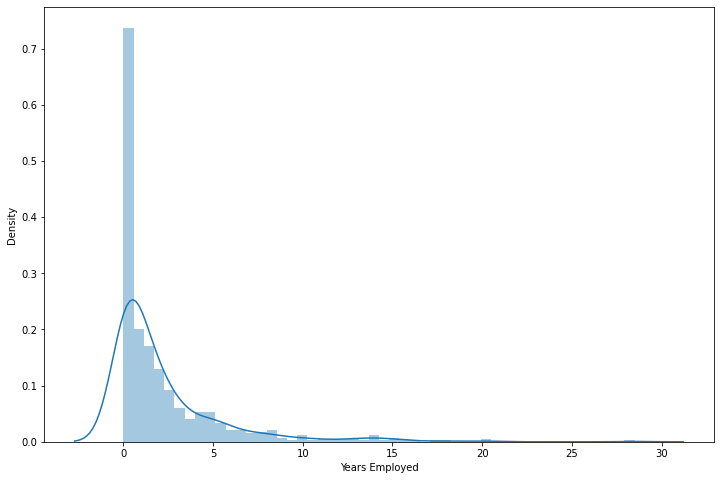

In [146]:
dim = (12, 8)
fig, ax = plt.subplots(figsize = dim)
p = features_to_scale[2]
sns.distplot(df1[p])

In [76]:
credit_card_dataset.drop("Unnamed: 0",inplace=True,axis=1)

### EDA

In [51]:
credit_card_dataset.Approved.value_counts()

-    383
+    307
Name: Approved, dtype: int64

### data is not  imbalanced
###

In [118]:
credit_card_dataset

,Gender,Age,Debt,Married,Bank Customer,Education,Ethnicity,Years Employed,Prior Default,Employed,...,Gender_encoded,Married_encoded,Bank Customer_encoded,Education_encoded,Ethnicity_encoded,Prior Default_encoded,Employed_encoded,Driving License_encoded,Citizenship_encoded,Approved_encoded
0,b,-0.062321,-0.956613,u,g,w,v,-0.291083,t,t,...,1,1,0,12,7,1,1,0,0,0
1,a,2.288101,-0.060051,u,g,q,h,0.244190,t,t,...,0,1,0,10,3,1,1,0,0,0
2,a,-0.596738,-0.856102,u,g,q,h,-0.216324,t,f,...,0,1,0,10,3,1,0,0,0,0
3,b,-0.315599,-0.647038,u,g,w,v,0.456505,t,t,...,1,1,0,12,7,1,1,1,0,0
4,b,-0.962303,0.174141,u,g,w,v,-0.153526,t,f,...,1,1,0,12,7,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,-0.885475,1.070704,y,p,e,h,-0.291083,f,f,...,1,2,2,4,3,0,0,0,0,1
686,a,-0.751238,-0.805846,u,g,c,v,-0.066806,f,t,...,0,1,0,1,7,0,1,1,0,1
687,a,-0.533418,1.757198,y,p,ff,ff,-0.066806,f,t,...,0,2,2,5,2,0,1,1,0,1
688,b,-1.152262,-0.915403,u,g,aa,v,-0.652915,f,f,...,1,1,0,0,7,0,0,0,0,1


In [77]:
features_conituos=['Age', 'Debt', 'Years Employed', 'Credit Score', 'Zip Code', 'Income']

In [78]:
features_categorical=['Gender', 'Married', 'Bank Customer', 'Education', 'Ethnicity', 'Prior Default', 'Employed', 'Driving License', 'Citizenship']

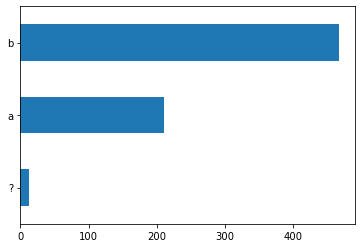

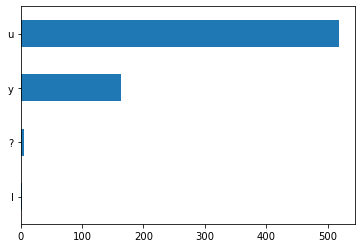

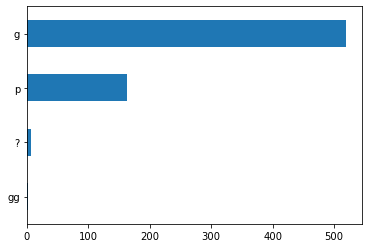

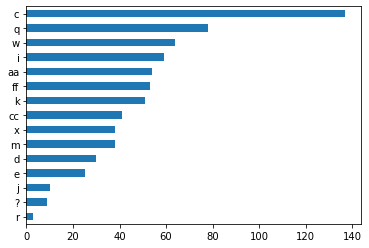

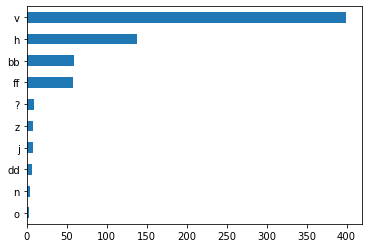

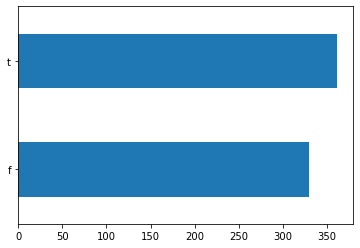

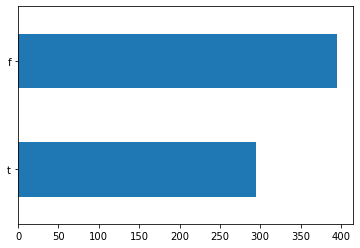

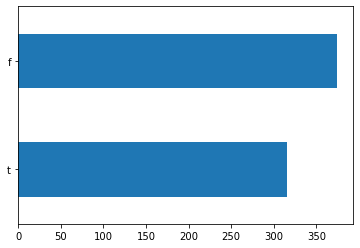

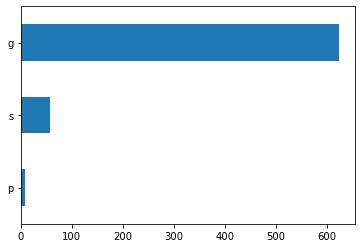

In [147]:
plotValueCounts(df1,features_categorical)

In [79]:
def replace_missingvalues_categorical(df, colNames):
    for col in colNames[:]:
        temp = df[col].value_counts().to_dict()
        if '?' in temp:
            temp['?'] = max(temp)

        for i in temp:
            if i!='?':
                temp[i] = i
        df[col] = df[col].map(temp)

In [80]:
def replcae_missingvalues_continuos(df,colNames):
    for col in colNames:
        df[col] = pd.to_numeric(df[col], errors = 'coerce')
        df[col] = df[col].fillna(df[col].mean())


In [81]:
replace_missingvalues_categorical(credit_card_dataset,features_categorical)

In [82]:
replcae_missingvalues_continuos(credit_card_dataset,features_conituos)

In [59]:
### Ordinal Encoding--- Change
def convertStringToNumeric(df, colNames):
    for cols in colNames:
        d = {}
        for i in df[cols]:
            print(i)
            if i not in d:
                d[i] = len(d)
        df[cols] = df[cols].map(d)

In [83]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()


In [84]:
columnsToEncode=['Gender', 'Married', 'Bank Customer', 'Education', 'Ethnicity', 'Prior Default', 'Employed', 'Driving License', 'Citizenship', 'Approved']

In [85]:
for column in columnsToEncode:
    credit_card_dataset[column+'_encoded'] = labelencoder.fit_transform(credit_card_dataset[column])


In [87]:
credit_card_dataset_encoded=credit_card_dataset.drop(columns=columnsToEncode)

In [121]:
convertStringToNumeric(credit_card_dataset_encoded,['Gender', 'Married', 'Bank Customer', 'Education', 'Ethnicity', 'Prior Default', 'Employed', 'Driving License', 'Citizenship', 'Approved'])

KeyError: 'Gender'

In [122]:
credit_card_dataset

,Gender,Age,Debt,Married,Bank Customer,Education,Ethnicity,Years Employed,Prior Default,Employed,...,Gender_encoded,Married_encoded,Bank Customer_encoded,Education_encoded,Ethnicity_encoded,Prior Default_encoded,Employed_encoded,Driving License_encoded,Citizenship_encoded,Approved_encoded
0,0,-0.062321,-0.956613,0,0,0,0,-0.291083,0,0,...,1,1,0,12,7,1,1,0,0,0
1,1,2.288101,-0.060051,0,0,1,1,0.244190,0,0,...,0,1,0,10,3,1,1,0,0,0
2,1,-0.596738,-0.856102,0,0,1,1,-0.216324,0,1,...,0,1,0,10,3,1,0,0,0,0
3,0,-0.315599,-0.647038,0,0,0,0,0.456505,0,0,...,1,1,0,12,7,1,1,1,0,0
4,0,-0.962303,0.174141,0,0,0,0,-0.153526,0,1,...,1,1,0,12,7,1,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0,-0.885475,1.070704,1,1,10,1,-0.291083,1,1,...,1,2,2,4,3,0,0,0,0,1
686,1,-0.751238,-0.805846,0,0,6,0,-0.066806,1,0,...,0,1,0,1,7,0,1,1,0,1
687,1,-0.533418,1.757198,1,1,12,3,-0.066806,1,0,...,0,2,2,5,2,0,1,1,0,1
688,0,-1.152262,-0.915403,0,0,11,0,-0.652915,1,1,...,1,1,0,0,7,0,0,0,0,1


### Feature Scaling

### Box Plot

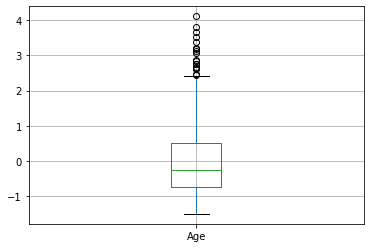

count    6.900000e+02
mean     4.730515e-17
std      1.000725e+00
min     -1.504318e+00
25%     -7.512378e-01
50%     -2.484804e-01
75%      5.183195e-01
max      4.110016e+00
Name: Age, dtype: float64

In [148]:

plotBoxPlots(credit_card_dataset,['Age'])
credit_card_dataset['Age'].describe()

In [18]:
def plotBoxPlots(df,columnList):
    for col in columnList:
        display(HTML("<b>"+col+"</b>"))
        df.boxplot(column=[col])
        plt.show()

In [88]:
features_to_scale = ['Age', 'Debt', 'Years Employed', 'Credit Score', 'Zip Code', 'Income']

scaler = StandardScaler()
credit_card_dataset[features_to_scale] = scaler.fit_transform(credit_card_dataset[features_to_scale])
credit_card_dataset_encoded[features_to_scale] = scaler.fit_transform(credit_card_dataset_encoded[features_to_scale])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Years Employed', ylabel='Density'>

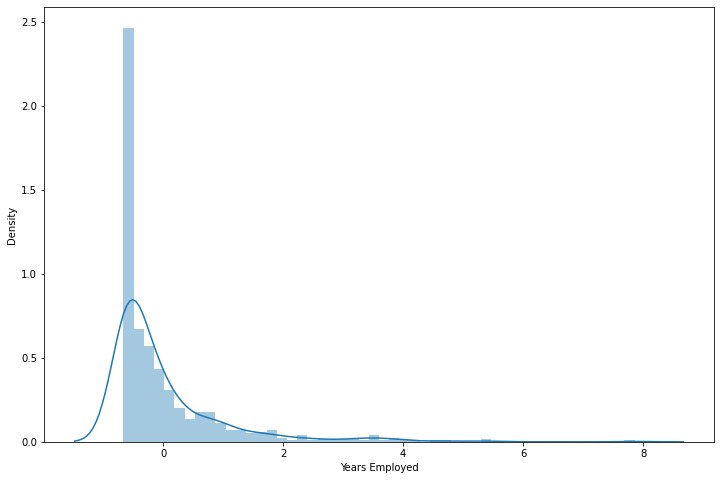

In [142]:
dim = (12, 8)
fig, ax = plt.subplots(figsize = dim)
p = features_to_scale[2]
sns.distplot(credit_card_dataset[p])

### Deciding Features

In [89]:
cMatrix=credit_card_dataset_encoded.corr()

In [90]:
cMatrix

,Age,Debt,Years Employed,Credit Score,Zip Code,Income,Gender_encoded,Married_encoded,Bank Customer_encoded,Education_encoded,Ethnicity_encoded,Prior Default_encoded,Employed_encoded,Driving License_encoded,Citizenship_encoded,Approved_encoded
Age,1.000000,0.201316,0.392787,0.185575,-0.077161,0.018539,0.035604,-0.081809,-0.094514,0.038152,-0.165827,0.204342,0.083681,0.054778,-0.014584,-0.161627
Debt,0.201316,1.000000,0.298902,0.271207,-0.222346,0.123121,-0.041746,-0.109538,-0.097738,-0.003423,-0.051098,0.244317,0.174846,-0.013023,-0.122233,-0.206294
Years Employed,0.392787,0.298902,1.000000,0.322330,-0.076389,0.051345,0.086544,-0.092937,-0.085616,0.013322,-0.106371,0.345689,0.222982,0.138139,-0.020528,-0.322475
Credit Score,0.185575,0.271207,0.322330,1.000000,-0.119809,0.063692,-0.024630,-0.115038,-0.121360,-0.010959,-0.038893,0.379532,0.571498,0.006944,-0.139527,-0.406410
Zip Code,-0.077161,-0.222346,-0.076389,-0.119809,1.000000,0.065609,0.083396,0.001736,0.012980,0.068324,-0.018066,-0.067388,-0.053321,0.144253,0.094091,0.099972
Income,0.018539,0.123121,0.051345,0.063692,0.065609,1.000000,-0.002063,-0.122515,-0.028814,-0.002046,-0.018149,0.090012,0.077652,0.019201,-0.012017,-0.175657
Gender_encoded,0.035604,-0.041746,0.086544,-0.024630,0.083396,-0.002063,1.000000,0.071143,0.067666,-0.010507,0.054260,-0.026047,-0.077784,0.051674,0.085488,0.028934
Married_encoded,-0.081809,-0.109538,-0.092937,-0.115038,0.001736,-0.122515,0.071143,1.000000,0.982687,-0.016782,-0.002162,-0.149227,-0.177769,-0.023277,-0.015105,0.183031
Bank Customer_encoded,-0.094514,-0.097738,-0.085616,-0.121360,0.012980,-0.028814,0.067666,0.982687,1.000000,-0.022478,-0.006644,-0.161541,-0.188559,-0.012547,0.008717,0.173853
Education_encoded,0.038152,-0.003423,0.013322,-0.010959,0.068324,-0.002046,-0.010507,-0.016782,-0.022478,1.000000,0.035223,0.078672,0.095968,0.048265,0.035857,-0.129058


In [23]:
final_features = ['Age', 'Debt', 'Ethnicity', 'Years Employed', 'Prior Default', 'Employed', 'Credit Score', 'Driving License', 'Income']


In [91]:
final_features_encoded=['Age', 'Debt', 'Ethnicity_encoded', 'Years Employed', 'Prior Default_encoded', 'Employed_encoded', 'Credit Score', 'Driving License_encoded', 'Income']

### Splitiing Data

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [129]:
x = final_features
y = ['Approved_encoded']
# x = credit_card_dataset.columns[:len(credit_card_dataset.columns)-1]

In [130]:
xTrain, xTest, yTrain, yTest = train_test_split(credit_card_dataset[x], credit_card_dataset[y],test_size=0.30,random_state=2)

In [131]:
xTrain

,Age,Debt,Ethnicity,Years Employed,Prior Default,Employed,Credit Score,Driving License,Income
52,0.494047,-0.546526,0,-0.652915,0,1,-0.493887,1,0.918616
655,-0.885475,0.048502,3,-0.664877,1,1,-0.493887,0,-0.195413
577,-0.540173,0.249525,0,-0.365841,0,0,0.123472,0,-0.195413
178,-1.110049,0.902850,0,-0.303044,0,0,0.329258,0,-0.091693
558,1.676012,-0.948572,1,-0.652915,0,1,-0.493887,0,0.380809
...,...,...,...,...,...,...,...,...,...
534,0.022105,-0.454056,0,1.577888,0,1,-0.493887,1,-0.195413
584,-0.294493,2.058732,5,-0.664877,0,1,-0.493887,0,2.342269
493,-0.934442,1.422494,1,1.129335,0,1,-0.493887,0,-0.195413
527,2.153864,-0.889271,2,-0.365841,0,1,-0.493887,1,0.226573


### Fitting models

In [132]:
from sklearn.linear_model import LogisticRegression


In [133]:
lr = LogisticRegression(random_state = 0)
lr.fit(xTrain, yTrain)
ypred=lr.predict(xTest)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [134]:
ypred=lr.predict(xTest)

In [135]:
y_pred_lr = [1 if x >= 0.50 else 0 for x in (lr.predict_proba(xTest)[:, 1])]

In [136]:
from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
def get_confusion_matrix_values(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return(cm[0][0], cm[0][1], cm[1][0], cm[1][1])
print(round(precision_score(yTest,ypred)*100))

89


              precision    recall  f1-score   support

           0       0.89      0.88      0.89       102
           1       0.89      0.90      0.89       105

    accuracy                           0.89       207
   macro avg       0.89      0.89      0.89       207
weighted avg       0.89      0.89      0.89       207



<AxesSubplot:>

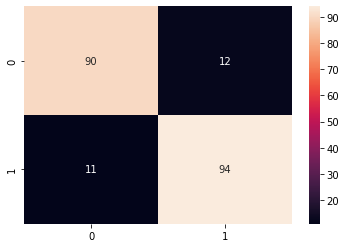

In [137]:
from sklearn.metrics import classification_report
print(classification_report(yTest,ypred))
sns.heatmap(confusion_matrix(yTest,ypred),annot=True)

In [101]:
print("Accuracy", metrics.accuracy_score(yTest, ypred)*100)

Accuracy 85.99033816425121


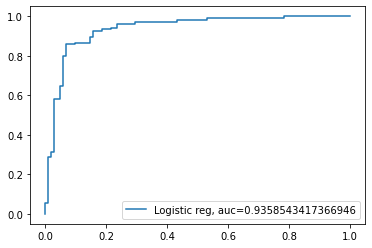

In [102]:
y_pred_proba = lr.predict_proba(xTest)[::,1]
fpr, tpr, _ = metrics.roc_curve(yTest,  y_pred_proba)
auc = metrics.roc_auc_score(yTest, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic reg, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [103]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(random_state=0)
clf.fit(xTrain, yTrain)

testPred = clf.predict(xTest)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.88      0.84      0.86       102
           1       0.85      0.89      0.87       105

    accuracy                           0.86       207
   macro avg       0.87      0.86      0.86       207
weighted avg       0.87      0.86      0.86       207



<AxesSubplot:>

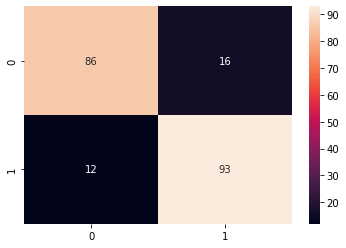

In [104]:
from sklearn.metrics import classification_report
print(classification_report(yTest,testPred))
sns.heatmap(confusion_matrix(yTest,testPred),annot=True)

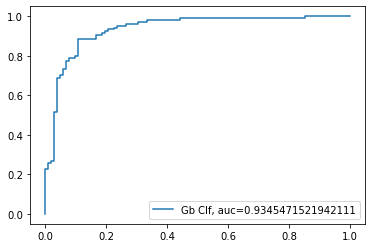

In [105]:
y_pred_proba_gb = clf.predict_proba(xTest)[::,1]
fpr, tpr, _ = metrics.roc_curve(yTest,  y_pred_proba_gb)
auc = metrics.roc_auc_score(yTest, y_pred_proba_gb)
plt.plot(fpr,tpr,label="Gb Clf, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [106]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',verbose=True, probability=True)

In [107]:
svc.fit(xTrain,yTrain)

[LibSVM]*
optimization finished, #iter = 227
obj = -118.000021, rho = -1.000607
nSV = 160, nBSV = 99
Total nSV = 160
*
optimization finished, #iter = 219
obj = -130.000114, rho = -1.000290
nSV = 164, nBSV = 111
Total nSV = 164
*
optimization finished, #iter = 197
obj = -128.000085, rho = -0.999970
nSV = 159, nBSV = 113
Total nSV = 159
*
optimization finished, #iter = 231
obj = -122.000008, rho = -1.000406
nSV = 147, nBSV = 102
Total nSV = 147
*
optimization finished, #iter = 192
obj = -120.000004, rho = -1.000058
nSV = 154, nBSV = 101
Total nSV = 154
*

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear', probability=True, verbose=True)


optimization finished, #iter = 280
obj = -154.000067, rho = 0.999873
nSV = 194, nBSV = 132
Total nSV = 194


In [108]:
y_pred_svm=svc.predict(xTest)

In [109]:
print(classification_report(yTest,y_pred_svm))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89       102
           1       0.92      0.85      0.88       105

    accuracy                           0.88       207
   macro avg       0.89      0.88      0.88       207
weighted avg       0.89      0.88      0.88       207



<AxesSubplot:>

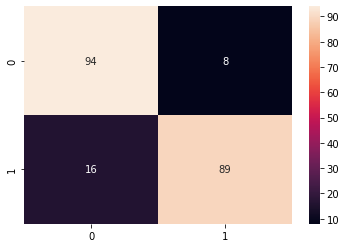

In [110]:

sns.heatmap(confusion_matrix(yTest,y_pred_svm),annot=True)

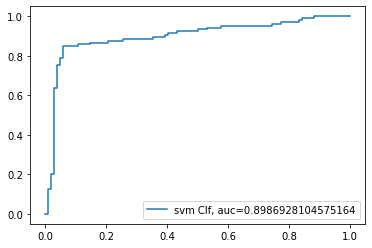

In [111]:
y_pred_proba_svm = svc.predict_proba(xTest)[::,1]
fpr, tpr, _ = metrics.roc_curve(yTest,  y_pred_proba_svm)
auc = metrics.roc_auc_score(yTest, y_pred_proba_svm)
plt.plot(fpr,tpr,label="svm Clf, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [112]:
from sklearn.ensemble import RandomForestClassifier as rfc

In [113]:

rforest = rfc(n_jobs = -1, max_features = 0.1, n_estimators = 100, bootstrap=False, random_state = 50, max_depth = 10)

In [114]:
rforest.fit(xTrain,yTrain)

/var/folders/vn/h7gjf32s4pb7x8cgs4kfb2840000gn/T/ipykernel_1210/3034258668.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest.fit(xTrain,yTrain)


RandomForestClassifier(bootstrap=False, max_depth=10, max_features=0.1,
                       n_jobs=-1, random_state=50)

In [115]:
y_pred_rf=rforest.predict(xTest)

In [116]:
print(classification_report(yTest,y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.78      0.85       102
           1       0.82      0.93      0.87       105

    accuracy                           0.86       207
   macro avg       0.87      0.86      0.86       207
weighted avg       0.87      0.86      0.86       207



[[80 22]
 [ 7 98]]


<AxesSubplot:>

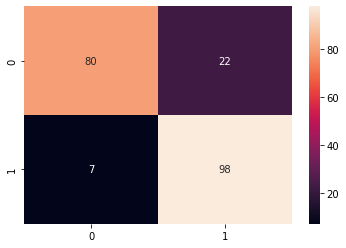

In [117]:
print(confusion_matrix(yTest,y_pred_rf))
sns.heatmap(confusion_matrix(yTest,y_pred_rf),annot=True)

In [68]:
for name, importance in zip(xTest.columns, rforest.feature_importances_):
    print(name, "=", importance)


Gender = 0.011719824342316039
Age = 0.11256343409052531
Debt = 0.11534307828021709
Ethnicity = 0.05978456263186318
Years Employed = 0.14498410257607316
Prior Default = 0.24764997814348608
Employed = 0.06721156999714893
Credit Score = 0.11448827633997961
Driving License = 0.012398750780321634
Income = 0.11385642281806897


### Storing Models

In [ ]:
import pickle
# pickle.dump(pipe_svm, open('svm_singa.pkl', 'wb'))

In [140]:
def loadPickle(path):
    with open(path, "rb") as f:
        return pickle.load(f) 

In [144]:
def dumpPickle(model,name):
    pickle.dump(model, open(name+".pkl", 'wb'))

In [147]:
dumpPickle(clf,"gb")

In [101]:
xTrain

,Gender,Age,Debt,Ethnicity,Years Employed,Prior Default,Employed,Credit Score,Driving License,Income
52,0,0.494047,-0.546526,0,-0.652915,0,1,-0.493887,1,0.918616
655,1,-0.885475,0.048502,3,-0.664877,1,1,-0.493887,0,-0.195413
577,0,-0.540173,0.249525,0,-0.365841,0,0,0.123472,0,-0.195413
178,1,-1.110049,0.902850,0,-0.303044,0,0,0.329258,0,-0.091693
558,0,1.676012,-0.948572,1,-0.652915,0,1,-0.493887,0,0.380809
...,...,...,...,...,...,...,...,...,...,...
534,0,0.022105,-0.454056,0,1.577888,0,1,-0.493887,1,-0.195413
584,1,-0.294493,2.058732,5,-0.664877,0,1,-0.493887,0,2.342269
493,1,-0.934442,1.422494,1,1.129335,0,1,-0.493887,0,-0.195413
527,1,2.153864,-0.889271,2,-0.365841,0,1,-0.493887,1,0.226573
